# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[25, 17, 68, ..., 70, 48, 85],
       [31, 10, 25, ..., 78, 11, 29],
       [68, 92, 61, ..., 26, 76, 78],
       ...,
       [79, 58, 55, ..., 29, 17, 49],
       [94, 97,  0, ..., 30, 48, 98],
       [71, 35, 52, ..., 96, 28, 60]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [ ]:
B = A.copy()
np.random.shuffle(B.T)
B

array([[35, 26, 14, ..., 57, 13, 34],
       [46, 44, 50, ..., 80, 93, 68],
       [37, 97, 80, ..., 84, 55, 75],
       ...,
       [87, 19,  9, ...,  0,  8, 50],
       [58, 34, 42, ..., 17, 12, 64],
       [51, 73, 19, ..., 23, 82, 37]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [ ]:
idxs = np.where(np.sum(A[:, ::2], axis=1) > np.mean(A[:, 1::2].sum(axis=1)), 1, 0)
A[np.where(idxs)[0]]

array([[34, 84, 97, ..., 80, 57, 76],
       [80, 37, 77, ..., 56, 83, 70],
       [89, 71, 85, ..., 30, 86, 19],
       ...,
       [ 5, 39, 48, ..., 12,  9,  6],
       [98, 25, 67, ..., 49, 12, 35],
       [99, 82, 73, ..., 78, 36, 12]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [ ]:
b = np.amax(A, axis=1) - np.amin(A, axis=1)
np.where(b == np.amax(b))[0][0]

8

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [ ]:
C = A.copy()
x = len(A)
y = len(A[0])
(np.argsort(np.argsort(C.reshape(x*y))) + 1).reshape(x,y)


array([[3106,  715, 8517, ..., 8610, 6558, 8526],
       [3584, 8490, 9724, ..., 8020, 5834, 7635],
       [8017, 3842, 7802, ..., 5755, 8352, 7032],
       ...,
       [9949, 8227, 7365, ..., 7866, 3712, 1283],
       [3526, 8018, 2883, ..., 2520, 1209, 1522],
       [1055, 5693,  430, ..., 1830, 5855, 9834]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [ ]:
x = len(A)
D = A.copy()
D = (A - np.amin(A, axis=1).reshape(x,1))/(np.amax(A, axis = 1) - np.amin(A, axis=1)).reshape(x,1)
D

array([[0.27659574, 0.0212766 , 0.86170213, ..., 0.87234043, 0.64893617,
        0.86170213],
       [0.34693878, 0.85714286, 0.98979592, ..., 0.81632653, 0.58163265,
        0.7755102 ],
       [0.81632653, 0.37755102, 0.78571429, ..., 0.57142857, 0.84693878,
        0.71428571],
       ...,
       [1.        , 0.82828283, 0.73737374, ..., 0.78787879, 0.36363636,
        0.12121212],
       [0.33673469, 0.80612245, 0.2755102 , ..., 0.23469388, 0.10204082,
        0.13265306],
       [0.09278351, 0.56701031, 0.03092784, ..., 0.16494845, 0.57731959,
        1.        ]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [ ]:
C = np.expand_dims(A, axis=0)
C = np.concatenate([C, [A*2, A*3, A*4, A*5, A*6, A*7, A*8, A*9, A*10]])
C

array([[[ 30,   6,  85, ...,  86,  65,  85],
        [ 34,  84,  97, ...,  80,  57,  76],
        [ 80,  37,  77, ...,  56,  83,  70],
        ...,
        [ 99,  82,  73, ...,  78,  36,  12],
        [ 34,  80,  28, ...,  24,  11,  14],
        [ 10,  56,   4, ...,  17,  57,  98]],

       [[ 60,  12, 170, ..., 172, 130, 170],
        [ 68, 168, 194, ..., 160, 114, 152],
        [160,  74, 154, ..., 112, 166, 140],
        ...,
        [198, 164, 146, ..., 156,  72,  24],
        [ 68, 160,  56, ...,  48,  22,  28],
        [ 20, 112,   8, ...,  34, 114, 196]],

       [[ 90,  18, 255, ..., 258, 195, 255],
        [102, 252, 291, ..., 240, 171, 228],
        [240, 111, 231, ..., 168, 249, 210],
        ...,
        [297, 246, 219, ..., 234, 108,  36],
        [102, 240,  84, ...,  72,  33,  42],
        [ 30, 168,  12, ...,  51, 171, 294]],

       ...,

       [[240,  48, 680, ..., 688, 520, 680],
        [272, 672, 776, ..., 640, 456, 608],
        [640, 296, 616, ..., 448, 664, 560

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [ ]:
C = np.concatenate((A.T[::2], A.T[1::2])).T
C

array([[30, 85, 66, ..., 73, 86, 85],
       [34, 97, 60, ..., 45, 80, 76],
       [80, 77, 67, ..., 87, 56, 70],
       ...,
       [99, 73, 56, ...,  2, 78, 12],
       [34, 28, 99, ..., 50, 24, 14],
       [10,  4, 53, ..., 12, 17, 98]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [ ]:
np.sum(np.all(A>5, axis=1) == True)

2

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [ ]:
np.mean(np.array(np.split(A, 10)).reshape(1000, 10), axis=1).reshape(20,50)

array([[45.5, 41.3, 52.5, 34.1, 51.1, 44.8, 47.7, 53.3, 44.8, 62.3, 55.7,
        49.1, 50.2, 63.5, 62.1, 73.4, 38.9, 44.2, 27.2, 46.1, 46.3, 51.5,
        43.5, 52.2, 56.8, 34.5, 46.1, 55.4, 36.9, 66.9, 55.9, 40.1, 54.2,
        52.4, 22.8, 49.8, 59. , 58.1, 57.2, 64.2, 54. , 49.6, 50.1, 73.5,
        52. , 63.2, 48.7, 50.9, 55.8, 42.9],
       [41.8, 49.2, 47.3, 54.8, 51.2, 51.4, 53.9, 35.7, 54.3, 53.8, 56.4,
        47.9, 44.5, 64.3, 49.4, 38.7, 57.5, 36. , 51.7, 41.4, 52. , 65. ,
        55.2, 46.6, 27.2, 52. , 29. , 52.7, 45.6, 38.2, 44.1, 54.9, 56.2,
        44.3, 58.8, 36.1, 48.7, 38.5, 44.7, 40.2, 42.4, 41.7, 52.1, 61.1,
        37. , 40.5, 54. , 50.5, 43.1, 44.9],
       [41.9, 61.6, 42.1, 38. , 49.7, 48.7, 52.5, 35.5, 63.4, 36.3, 49.4,
        33.7, 42.9, 35.6, 35.9, 51.1, 49.5, 51.2, 60. , 57.5, 47.7, 49.7,
        47.8, 43.6, 50.1, 41.7, 34.3, 62.8, 52. , 25.4, 52.9, 53.8, 58.8,
        43.6, 44.8, 37.1, 60.2, 30.5, 54. , 43.6, 39.8, 61.9, 64.6, 60.7,
        59.3, 34.3, 41

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [ ]:
idxs = np.unique(A.ravel(), return_index=True)[1]
A.ravel()[np.sort(idxs)]

array([30,  6, 85, 41, 66, 49, 58, 45, 15, 60, 23, 22, 24, 14, 26, 74, 77,
       72, 87, 33, 98, 51, 61, 12, 35, 13, 57, 78, 71, 56, 31,  4,  5, 50,
       68,  9, 34, 29, 47, 73, 86, 65, 84, 97, 17, 64, 38,  0, 44, 81, 90,
       19, 92, 46, 93, 80, 25, 63, 53, 76, 37, 67, 36, 79, 95, 27, 69, 54,
       55, 75, 83, 70, 48, 89, 94, 52, 59, 99, 16, 88, 43, 18, 32,  8, 91,
        3, 10, 82, 39, 96, 20, 62, 11,  2,  1,  7, 42, 40, 21, 28])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [ ]:
C = np.sqrt(np.sum(np.square(A - np.mean(A, axis=0)), axis=1))
C

array([184.4298492 , 197.78490659, 199.13829184, 216.43659412,
       201.96801548, 196.66689929, 204.83214903, 211.42672318,
       191.38941788, 209.8370541 , 194.34543801, 189.43742839,
       210.43884925, 199.73006603, 194.25457337, 199.62103916,
       210.29443472, 227.22889181, 203.68507377, 205.66231856,
       192.25992634, 199.77447103, 206.12578508, 204.97438688,
       204.17641704, 200.01719745, 206.73787576, 204.00350309,
       222.50813305, 202.84040346, 209.88753959, 191.87641667,
       205.90201377, 183.03499467, 214.90618715, 209.14019048,
       213.45912788, 221.22689546, 190.59763712, 226.42621155,
       193.8990956 , 211.58272442, 207.09055815, 213.07925585,
       218.32757333, 222.08795392, 202.20605647, 206.11586372,
       189.82583932, 186.83393502, 213.83792759, 185.62496943,
       200.56831573, 208.2268217 , 212.66186606, 210.05351526,
       223.71441454, 190.22462847, 225.35083598, 200.49057154,
       206.31347332, 182.61352435, 199.74128085, 221.77

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [ ]:
C = A.copy()
np.where(C<50, C*2, C*3)

array([[ 60,  12, 255, ..., 258, 195, 255],
       [ 68, 252, 291, ..., 240, 171, 228],
       [240,  74, 231, ..., 168, 249, 210],
       ...,
       [297, 246, 219, ..., 234,  72,  24],
       [ 68, 240,  56, ...,  48,  22,  28],
       [ 20, 168,   8, ...,  34, 171, 294]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [ ]:
C = A.copy()
C = C.reshape(200*50)

def mov_avg(arr, n):
    res = np.cumsum(arr, dtype=float)
    res[n:] = res[n:] - res[:-n]
    return res[n-1:]/n

print(mov_avg(C,3) + np.append(mov_avg(C,5), [0,0]) + np.append(mov_avg(C,10), [0,0,0,0,0,0,0]))

[131.43333333 138.2        170.2        ...  91.26666667  52.66666667
  57.33333333]


# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

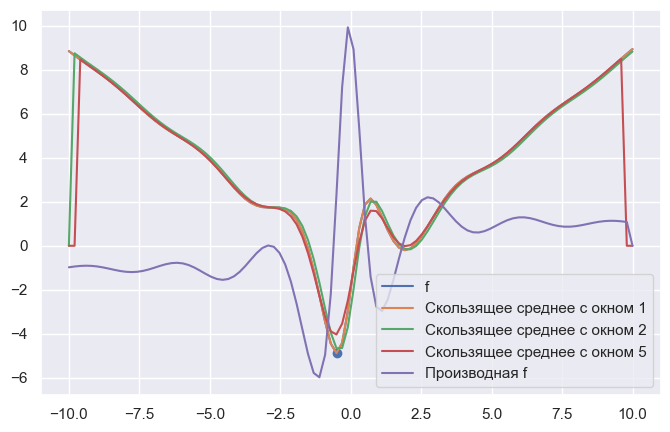

In [ ]:
import scipy

def f(x):
    return (5*np.sin(2*x) - (np.cos(x))**2 - 1 + abs(x**3) - x**2)/(x**2+1)

x = np.linspace(-10, 10, 100)

fig, ax=plt.subplots(figsize=(8, 5))

f_diff = np.append(np.diff(f(x))/0.2, 0)

def mov_avg(arr, n):
    res = np.cumsum(arr, dtype=float)
    res[n:] = res[n:] - res[:-n]
    return res[n-1:]/n
avg_1 = mov_avg(f(x), 1)
avg_2 = mov_avg(f(x), 2)
avg_5 = mov_avg(f(x), 5)
# print(avg_1)
avg_2 = np.insert(avg_2, 0, 0)
avg_5 = np.insert(avg_5, 0, [0,0])
avg_5 = np.append(avg_5, [0,0])
# np.append(avg_2, 0)
ax.plot(x, f(x), label='f')
ax.plot(x, avg_1, label='Скользящее среднее с окном 1')
ax.plot(x, avg_2, label='Скользящее среднее с окном 2')
ax.plot(x, avg_5, label='Скользящее среднее с окном 5')
ax.plot(x, f_diff, label='Производная f')
ax.scatter(scipy.optimize.golden(f, full_output=True)[0], scipy.optimize.golden(f, full_output=True)[1])
plt.legend(loc=4)
plt.show()


# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [ ]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 3, 0, 0, 4]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [ ]:
def sample_np(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    
    s = np.sum(x)
    val = s * np.random.random(size=c)
    idx = np.searchsorted(np.cumsum(x), val)
    return idx

sample_np(np.array([50, 3, 1, 7, 20]), 5)

array([4, 0, 4, 0, 0], dtype=int64)

In [ ]:
from scipy import stats

test_1 = sample([50, 3, 1, 7, 20], 1000)
test_2 = sample_np(np.array([50, 3, 1, 7, 20]), 1000)
stats.ks_2samp(test_1, test_2)

KstestResult(statistic=0.032, pvalue=0.6854967337920594, statistic_location=2, statistic_sign=-1)

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [ ]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2183

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [ ]:
def walk_np(n: int):
    arr = np.array([-3, -1, 0, 2, 3])
    pos_arr = np.random.choice(5, n)
    return np.sum(np.choose(pos_arr,arr))

walk_np(10_000)
%timeit walk_np(10_000)
%timeit walk(10_000)

238 µs ± 5.93 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.09 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


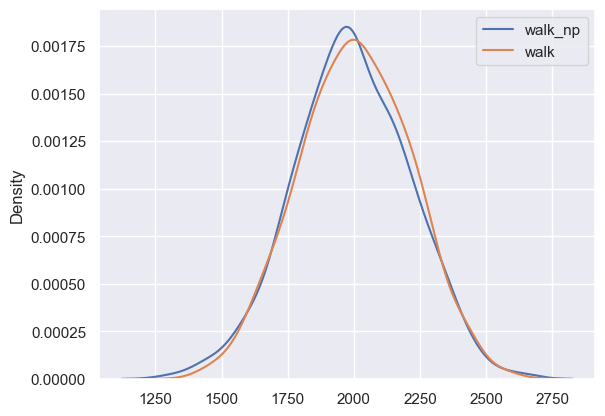

In [ ]:
tmp_1 = np.array([])
tmp_2 = np.array([])
for i in range(800):
    tmp_1 = np.append(tmp_1, walk_np(10_000))
    tmp_2 = np.append(tmp_2, walk(10_000))
   
sns.kdeplot(tmp_1, label='walk_np')
sns.kdeplot(tmp_2, label='walk')

plt.legend()
plt.show()

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [2]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]
    t = 1.
    for y in range(y - 5):
        for x in range(x - 3): 
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c
    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.3322398531195494

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [3]:
%load_ext cython

In [4]:
%%cython

cimport cython
cimport numpy as np
np.import_array()

ctypedef np.float64_t DTYPE_f

@cython.boundscheck(False)
@cython.wraparound(False) 
def strange_conv_c(DTYPE_f[:, :] a):
    cdef Py_ssize_t x = a.shape[0]
    cdef Py_ssize_t y = a.shape[1]

    cdef DTYPE_f t = 1.
    cdef DTYPE_f c
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c
            
    return t


In [5]:
strange_conv_c(a)

0.3322398531195494

In [8]:
import taichi as ti

ti.init()

@ti.kernel
def strange_conv_ti(a: ti.types.ndarray()) -> ti.f64:
    x = ti.u16(a.shape[0]) - 3
    y = ti.u16(a.shape[1]) - 5
    t = ti.f64(1.)
    ti.loop_config(serialize=True) 
    for i in ti.ndrange(y):
      for j in ti.ndrange(x):
        c = 1.5 * a[i+1, j+2] - a[i+5, j+3] * a[i, j] + 0.2 * a[i+4, j]
        t = 0.2 * t + 0.8 * c

      x = x - 4
    return t


strange_conv_ti(a)

[Taichi] Starting on arch=x64


0.33223986243667475

In [9]:
%timeit strange_conv(a)
%timeit strange_conv_c(a)
%timeit strange_conv_ti(a)

17.5 s ± 148 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
40.8 ms ± 502 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
41.8 ms ± 692 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
